# Randomisierte Algorithmen - Musterlösungen

### 1.a) Näherungslösung für bestimmte Integrale

Ein Integral ist die Fläche unterhalb einer Kurve. Um die Größe dieser Fläche zu approximieren, kann das Prinzip zur Bestimmung von $\pi$ via Zufallsregen adaptiert werden. Es muss nur ein Rechteck gefunden werden, welches durch die Kurve in zwei Flächen aufgetrennt wird. Die Gesamtfläche des Rechtecks kann leicht berechnet werden. Durch den Zufallsregen kann das Größenverhältnis der Teilflächen bestimmt werden. Damit werden die absoluten Größen der Teilflächen berechenbar.

In [79]:
import math
import random

def f_square(x):
    return x*x

def randomRainIntegral(f, xFrom, xTo, yMin, yMax, repeat):
    cntBelow = 0
    cntAll = 0
    for i in range(repeat):
        x = random.uniform(xFrom, xTo)
        y = random.uniform(yMin, yMax)
        if f(x) >= y:
            cntBelow += 1
        cntAll += 1
    aRect = (xTo-xFrom)*(yMax-yMin)
    return aRect * cntBelow/cntAll

randomRainIntegral(f_square, 0, 1, 0, 1, 100000)


0.33301

### 1.b) Zufallsregen und empirische Analyse

Bei den hier gezeigten Beispielen wurden zufällig Koordinaten generiert die *verregnet* wurden. Es können jedoch auch beliebige andere Dinge zufällig generiert werden (Graphen, Rucksackprobleme, ...). So wie die zufälligen Koordinaten als Eingabe für eine Funktion verwendet wurden, können natürlich auch Graphen oder Rucksackprobleme von bestimmten Algorithmen verarbeitet werden. Durch eine Funktion wird jeder x-Koordinate eine y-Koordinate zugeordnet. Analog wird einer konkreten Probleminstanz durch den Algorithmus, der auf diese angewendet wird, eine bestimmte Laufzeit zugeordnet. Eine einzelne Ausführung ist bei zufälligen Probleminstanzen oder Koordinaten relativ unzuverlässig. Durch mehrfache Ausführung kann das Ergebnis aber immer genauer spezifiziert werden.

Im Prinzip kann die empirische Analyse eines Algorithmus durchaus als Zufallsregen angesehen werden, der die Laufzeit eines Algorithmus annähert.

### 2.a) Zellulärer Automat nach Regel 30

Bei zellulären Automaten werden die Zellzustände mittels gewisser Regeln in ihren jeweiligen Zielzustand überführt. Die Regeln betrachten dabei immer nur die Zustände von Zellen in einem gewissen Umfeld. Ein eindimensionaler zellulärer Automat besteht aus einer einfachen Reihe von Zellen deren Zustand nur die Werte 0 oder 1 (bzw. schwarz oder weiß) annehmen kann. Die Folgereihe wird mittels einfacher Regeln aus der vorherigen abgeleitet. Regel 30 besagt, dass sich der Zustand der Folgezelle $F_i$ aus den Zuständen der Vorgängerzellen $(V_{i-1},V_i,V_{i+1})$ ergibt. Nur in den Fällen $(1,0,0)$, $(0,1,1)$, $(0,1,0)$ und $(0,0,1)$ ergibt sich $F_i=1$ (anderenfalls $F_i=0$).

In [26]:
def rule30(a):
    x = a[-1]+a+a[0] # wrapping: letzte Zelle voran, erste ans Ende
    b = ""
    for i in range(1,len(x)-1):
        p = x[i-1:i+2]
        if p == "■□□" or p == "□■■" or p == "□■□" or p == "□□■":
            b += "■"
        else:
            b += "□"
    return b
        
a = "□□□□□□□□□□■□□□□□□□□□□"       
print(a)
for _ in range(len(a)//2):
    a = rule30(a)        
    print(a)


□□□□□□□□□□■□□□□□□□□□□
□□□□□□□□□■■■□□□□□□□□□
□□□□□□□□■■□□■□□□□□□□□
□□□□□□□■■□■■■■□□□□□□□
□□□□□□■■□□■□□□■□□□□□□
□□□□□■■□■■■■□■■■□□□□□
□□□□■■□□■□□□□■□□■□□□□
□□□■■□■■■■□□■■■■■■□□□
□□■■□□■□□□■■■□□□□□■□□
□■■□■■■■□■■□□■□□□■■■□
■■□□■□□□□■□■■■■□■■□□■


### 2.b) Zufallszahlengenerator nach Regel 30

Regel 30 ist dafür bekannt, dass Sie die generierten Zustandsfolgen einen chaotischen Charakter haben. Sie scheinen also zufällig und es ist kein periodisches Verhalten erkennbar. Aus diesem Grund kann Regel 30 für die Generierung von Pseudozufallszahlen verwendet werden.

Wie auch beim Kongruenzgenerator muss ein zufälliger Ausgangszustand (Seed) gewählt werden, denn bei gleichem Ausgangszustand wird immer die gleiche Zustandsfolge (Zufallszahlenfolge) berechnet. In folgendem Generator wird dazu die Systemzeit als initiale Binärfolge genutzt. Diese Binärfolge wird nun sukzessive mittels Regel 30 verändert. Betrachtet man das durch Regel 30 entstehende Muster fällt auf, dass die linke Seite des Dreiecks etwas regelmäßiger gestaltet ist als die rechte. Aus diesem Grund wird in der aktuellen Binärfolge rechts der Mitte die nächste 1 gesucht, 8 Binärzeichen extrahiert und zu einer natürlichen Zahl umgewandelt. Diese befindet sich wegen der führenden 1 im Intervall [128,255]. Durch Subtraktion von 128 wird das Ergebnisintervall [0,127] erreicht.

In [100]:
def rule30bin(a):
    x = a[-1]+a+a[0]
    b = ""
    for i in range(1,len(x)-1):
        p = x[i-1:i+2]
        if p == "100" or p == "011" or p == "010" or p == "001":
            b += "1"
        else:
            b += "0"
    return b

import time
seed = "{0:b}".format(math.floor(time.time()*100000))
def r30random():
    global seed
    seed = rule30bin(seed)
    i = len(seed)//2 # die erste 1 suchen
    while seed[i] == "0": i += 1
    return int(seed[i:i+8], 2)-128 # die nächsten 8 bits

# 10 Zufallszahlen im Intervall [0,127]
for _ in range(10):
    print(r30random())
    

39
55
36
123
96
17
123
2
70
44


### 2.c) Empirische Analyse der Zufallszahlen

Eine Zahl in einem vorgegebenen Bereich kann als Zufallszahl angesehen werden, wenn Sie in einer Stichprobe genauso häufig vorkommt wie jede andere Zahl aus diesem Bereich. Um das zu prüfen wird eine große Zahl von Zufallszahlen erzeugt und das Auftreten jeder einzelnen Zahl gezählt. Je mehr Zahlen generiert werden, umso ausgeglichener sollten die Anzahlen werden. Für den hier getesteten Zufallsgenerator bestätigt das die folgende Analyse.

[763, 731, 820, 798, 760, 737, 809, 765, 801, 816, 769, 763, 773, 790, 778, 816, 804, 822, 746, 755, 794, 763, 775, 794, 771, 764, 723, 778, 769, 800, 785, 762, 787, 799, 759, 743, 758, 832, 748, 795, 841, 800, 766, 805, 777, 824, 797, 801, 771, 785, 799, 841, 746, 801, 732, 809, 762, 790, 796, 810, 803, 766, 738, 788, 790, 731, 811, 790, 766, 818, 785, 746, 783, 786, 746, 828, 812, 782, 790, 771, 779, 774, 811, 784, 770, 812, 809, 760, 806, 809, 773, 786, 782, 813, 777, 784, 764, 744, 739, 845, 768, 792, 802, 761, 795, 793, 788, 734, 761, 765, 769, 769, 752, 810, 739, 722, 808, 720, 785, 800, 807, 802, 799, 773, 791, 759, 744, 773]


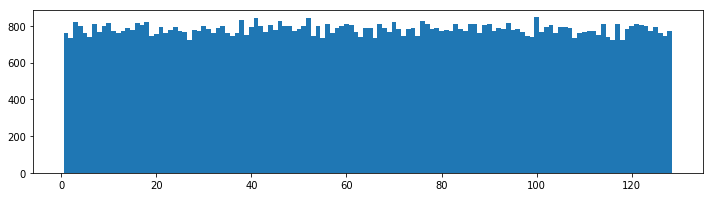

In [102]:
cnt = [0 for _ in range(2**7)] # 128 Zähler
for i in range(100000):
    r = r30random()
    cnt[r] += 1 # Zufallszahl zählen

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,3)
c = plt.bar(range(1,len(cnt)+1), cnt, width=1)
print(cnt)

### 3.a) Quicksort vs. Quicksort

Eine Zahl in einem vorgegebenen B

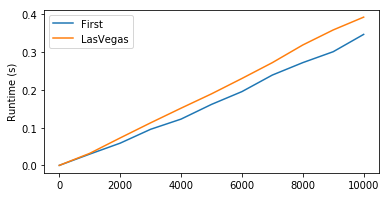

In [116]:
import random
def quicksort(lst, lasVegas):
    if len(lst) < 2:
        return lst
    if lasVegas:
        pivot = random.choice(lst) # zufällige Auswahl eines Elements
    else:
        pivot = lst[0]
    smaller = []
    equal = []
    larger = []
    for i in range(0, len(lst)):
        if lst[i] < pivot:
            smaller.append(lst[i])
        elif lst[i] > pivot:
            larger.append(lst[i])
        else:
            equal.append(lst[i])
    return quicksort(smaller, lasVegas) + equal + quicksort(larger, lasVegas)

def getRandomList(n):
    lst = list(range(n))
    random.shuffle(lst)
    return lst

def compareQuicksort(n, genList, numOfRuns):
    time1 = 0
    time2 = 0
    for i in range(numOfRuns):
        lst = genList(n)
        tstart = time.time()
        quicksort(lst,False)
        time1 += time.time()-tstart
        tstart = time.time()
        quicksort(lst,True)
        time2 += time.time()-tstart
    return (time1, time2)

sizes = []
times1 = []
times2 = []
for n in range(1, 10002, 1000):
    (time1, time2) = compareQuicksort(n, getRandomList, 10)
    sizes.append(n)
    times1.append(time1)
    times2.append(time2)
    
plt.rcParams["figure.figsize"] = (6,3)
ax = plt.subplot()
ax.plot(sizes, times1, label="First")
ax.plot(sizes, times2, label="LasVegas")
ax.set_ylabel("Runtime (s)")
l1 = ax.legend()

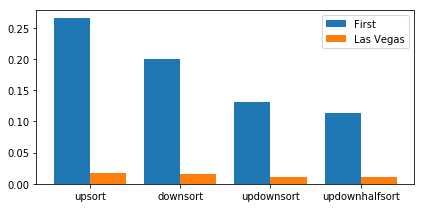

In [133]:
def upsort(n):
    return list(range(n))

def downsort(n):
    return list(reversed(range(n)))

def updownsort(n):
    return upsort(n//2)+downsort(n-(n//2))

def updownhalfsort(n):
    up = upsort(n)
    down = downsort(n)
    return [up[i] if i%2==0 else down[i] for i in range(n)]

classes = [("upsort",upsort),("downsort", downsort), ("updownsort",updownsort),("updownhalfsort",updownhalfsort)]
index = range(len(classes))
times1 = []
times2 = []
for c in classes:
    (time1, time2) = compareQuicksort(500, c[1], 10)
    sizes.append(n)
    times1.append(time1)
    times2.append(time2)

plt.rcParams["figure.figsize"] = (6,3)
plt.bar(index, times1, label='First', width=0.4)
plt.bar([i+0.4 for i in index], times2, label='Las Vegas', width=0.4)
plt.xticks([i+0.2 for i in index], [c[0] for c in classes])
plt.legend()
plt.tight_layout()